In [1]:
import keras
import os
import numpy as np
import pandas as pd
import glob

import tensorflow as tf
from keras import optimizers
from keras.preprocessing.image import  img_to_array, load_img
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image

#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # 開啟硬體加速
batch_size = 80 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 2 # 類別的數量
epochs = 250    # 訓練的 epochs 數量

In [3]:
dict_labels = {"cats":1, "dogs":0}
size = (64,64)
nbofdata = 2000

for folders in glob.glob("kaggle_dogcat/train/*"):
    print(folders)
    images=[]
    labels_hot=[]
    labels=[]
    nbofdata_i=1
    for filename in os.listdir(folders):
        if nbofdata_i <= nbofdata:
                    label = os.path.basename(folders)
                    className = np.asarray(label)
                    img = load_img(os.path.join(folders,filename))
                    img = img.resize(size,Image.BILINEAR)
                    if img is not None:
                        if label is not None:
                            labels.append(className)
                            labels_hot.append(dict_labels[label])
                        x = img_to_array(img)
                        images.append(x)
                    nbofdata_i+=1
    images=np.array(images)    
    labels_hot=np.array(labels_hot)
    print("images.shape={}, labels_hot.shape=={}".format(images.shape, labels_hot.shape))    
    imagesavepath='Cat_Dog_Dataset/'
    if not os.path.exists(imagesavepath):
        os.makedirs(imagesavepath)
    # Save
    np.save(imagesavepath+'{}_images.npy'.format(label),images)    
    np.save(imagesavepath+'{}_label.npy'.format(label),labels)    
    np.save(imagesavepath+'{}_labels_hot.npy'.format(label),labels_hot)
    print('{} files has been saved.'.format(label))
    
# from : 默默地學 Deep Learning (3)-貓狗資料集

kaggle_dogcat/train\cats
images.shape=(2000, 64, 64, 3), labels_hot.shape==(2000,)
cats files has been saved.
kaggle_dogcat/train\dogs
images.shape=(2000, 64, 64, 3), labels_hot.shape==(2000,)
dogs files has been saved.


In [4]:
images_all = []
labels_all = []

# Read cat npy file
images_cat = np.load('Cat_Dog_Dataset/cats_images.npy')
images_all = images_cat
labels_cat = np.load('Cat_Dog_Dataset/cats_labels_hot.npy')
labels_all = labels_cat

# Read dog npy file
images_dog = np.load('Cat_Dog_Dataset/dogs_images.npy')
images_all = np.append(images_all,images_dog,axis=0)

labels_dog = np.load('Cat_Dog_Dataset/dogs_labels_hot.npy')
labels_all = np.append(labels_all,labels_dog,axis=0)
len(labels_all)

# from : 默默地學 Deep Learning (3)-貓狗資料集

4000

In [5]:
x_train, x_val, y_train, y_val = train_test_split(images_all, labels_all, test_size=0.1, random_state=0)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('\n')
print('x_val shape:', x_val.shape)
print(x_val.shape[0], 'val samples')

x_train shape: (3600, 64, 64, 3)
3600 train samples


x_val shape: (400, 64, 64, 3)
400 val samples


In [6]:
x_train = x_train.astype('float32') /255
x_val = x_val.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

[0. 1.]


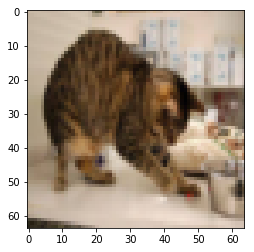

In [7]:
ex = x_train[12]
print(y_train[12])
plt.imshow((ex*255).astype(np.uint8))
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

W1225 23:47:13.268553 12868 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1225 23:47:13.578626 12868 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1225 23:47:13.659620 12868 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1225 23:47:13.741634 12868 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1225 23:47:13.744626 12868 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:133:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
__________

In [9]:
from keras.callbacks import EarlyStopping , ReduceLROnPlateau

earlystop = EarlyStopping( monitor = 'val_loss', 
                           patience = 16, 
                           verbose = 1)

lr_Reduce = ReduceLROnPlateau(monitor = 'val_loss', 
                              patience = 6,
                              verbose = 1,
                              factor = 0.5,
                              min_lr = 0.00001)

In [10]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

W1225 23:47:13.962639 12868 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1225 23:47:14.363673 12868 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3600 samples, validate on 400 samples
Epoch 1/250
3600/3600 [==============================] - 15s 4ms/step - loss: 0.2513 - acc: 0.5092 - val_loss: 0.2501 - val_acc: 0.4850
Epoch 2/250
3600/3600 [==============================] - 2s 453us/step - loss: 0.2503 - acc: 0.5014 - val_loss: 0.2500 - val_acc: 0.5075
Epoch 3/250
3600/3600 [==============================] - 2s 452us/step - loss: 0.2502 - acc: 0.5003 - val_loss: 0.2500 - val_acc: 0.4975
Epoch 4/250
3600/3600 [==============================] - 2s 465us/step - loss: 0.2503 - acc: 0.5011 - val_loss: 0.2500 - val_acc: 0.5000
Epoch 5/250
3600/3600 [==============================] - 2s 452us/step - loss: 0.2500 - acc: 0.5139 - val_loss: 0.2500 - val_acc: 0.4975
Epoch 6/250
3600/3600 [==============================] - 2s 462us/step - loss: 0.2497 - acc: 0.5192 - val_loss: 0.2499 - val_acc: 0.5075
Epoch 7/250
3600/3600 [==============================] - 2s 474us/step - loss: 0.2502 - acc: 0.5161 - val_loss: 0.2500 - val_acc: 0.

3600/3600 [==============================] - 2s 470us/step - loss: 0.1387 - acc: 0.7992 - val_loss: 0.1708 - val_acc: 0.7625
Epoch 120/250
3600/3600 [==============================] - 2s 471us/step - loss: 0.1379 - acc: 0.8072 - val_loss: 0.1607 - val_acc: 0.7625
Epoch 121/250
3600/3600 [==============================] - 2s 472us/step - loss: 0.1337 - acc: 0.8144 - val_loss: 0.1508 - val_acc: 0.8000
Epoch 122/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.1323 - acc: 0.8081 - val_loss: 0.1594 - val_acc: 0.7725
Epoch 123/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.1365 - acc: 0.8083 - val_loss: 0.1488 - val_acc: 0.8000
Epoch 124/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.1319 - acc: 0.8128 - val_loss: 0.1411 - val_acc: 0.8125
Epoch 125/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.1250 - acc: 0.8281 - val_loss: 0.1646 - val_acc: 0.7725
Epoch 126/250
3600/3600 [================

3600/3600 [==============================] - 2s 471us/step - loss: 0.0824 - acc: 0.8872 - val_loss: 0.1154 - val_acc: 0.8600
Epoch 179/250
3600/3600 [==============================] - 2s 472us/step - loss: 0.0810 - acc: 0.8914 - val_loss: 0.1261 - val_acc: 0.8400
Epoch 180/250
3600/3600 [==============================] - 2s 471us/step - loss: 0.0813 - acc: 0.8883 - val_loss: 0.1226 - val_acc: 0.8425
Epoch 181/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.0800 - acc: 0.8933 - val_loss: 0.1167 - val_acc: 0.8400
Epoch 182/250
3600/3600 [==============================] - 2s 471us/step - loss: 0.0810 - acc: 0.8897 - val_loss: 0.1170 - val_acc: 0.8450
Epoch 183/250
3600/3600 [==============================] - 2s 471us/step - loss: 0.0774 - acc: 0.8978 - val_loss: 0.1308 - val_acc: 0.8175
Epoch 184/250
3600/3600 [==============================] - 2s 471us/step - loss: 0.0778 - acc: 0.8911 - val_loss: 0.1262 - val_acc: 0.8325
Epoch 185/250
3600/3600 [================

3600/3600 [==============================] - 2s 469us/step - loss: 0.0440 - acc: 0.9436 - val_loss: 0.1014 - val_acc: 0.8775
Epoch 238/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.0440 - acc: 0.9447 - val_loss: 0.1056 - val_acc: 0.8750
Epoch 239/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.0463 - acc: 0.9381 - val_loss: 0.1098 - val_acc: 0.8725
Epoch 240/250
3600/3600 [==============================] - 2s 471us/step - loss: 0.0444 - acc: 0.9411 - val_loss: 0.1130 - val_acc: 0.8600
Epoch 241/250
3600/3600 [==============================] - 2s 469us/step - loss: 0.0420 - acc: 0.9450 - val_loss: 0.1292 - val_acc: 0.8500
Epoch 242/250
3600/3600 [==============================] - 2s 470us/step - loss: 0.0492 - acc: 0.9375 - val_loss: 0.1196 - val_acc: 0.8525
Epoch 243/250
3600/3600 [==============================] - 2s 475us/step - loss: 0.0439 - acc: 0.9419 - val_loss: 0.1100 - val_acc: 0.8625
Epoch 244/250
3600/3600 [================

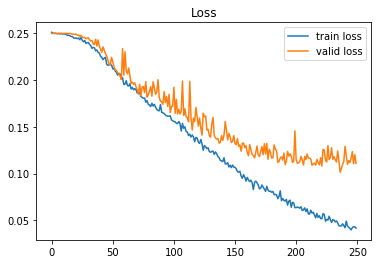

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

In [12]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.1109625169634819
Val accuracy: 0.86


In [13]:
model.save('CatDogClassifier.h5')

# From https://morvanzhou.github.io/tutorials/machine-learning/keras/3-1-save/